In [1]:
! git clone https://github.com/jennyschilling/project_gss_group11/

Cloning into 'project_gss_group11'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 41 (delta 16), reused 14 (delta 9), pack-reused 18
Receiving objects: 100% (41/41), 24.35 MiB | 22.23 MiB/s, done.
Resolving deltas: 100% (16/16), done.


      adoptus          immfate                   letin1a      letinhsp1  \
71012     3.0  become citizens          reduced a little      decreased   
71030     3.0  become citizens          reduced a little  left the same   
71028     3.0  become citizens          reduced a little  left the same   
71025     3.0  become citizens  remain the same as it is  left the same   
71022     3.0  become citizens        increased a little      increased   

           letinasn1   age     sex   race born  
71012  left the same  83.0    male  white  yes  
71030  left the same  33.0  female  white  yes  
71028  left the same  30.0    male  white  yes  
71025  left the same  20.0  female  white  yes  
71022      increased  21.0  female  white  yes  


<ipython-input-2-454898e61595>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = le.fit_transform(df['age'])


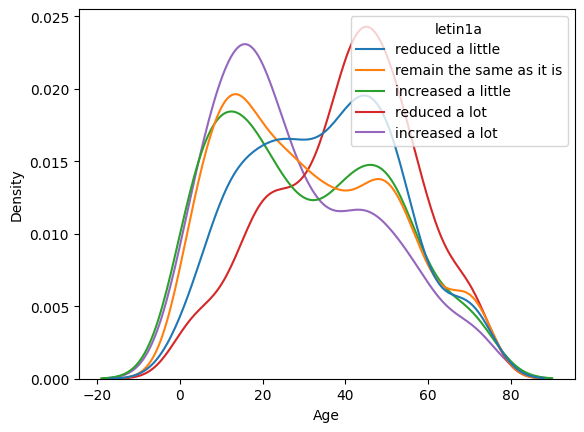

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./project_gss_group11/selected_gss_data.csv', low_memory=False)

# sort the data by adoptus, non-numerical values will go to top which we will remove
df = df.sort_values(by=['adoptus'], ascending=False)

# remove the extra two header rows created from our loop in get_gss.ipynb
df = df.iloc[2:]

# doesn't impact results at all
df = df.drop('parborn', axis = 1)

# drop rows w missing values in crucial columns
df = df.dropna(subset=['adoptus', 'immfate', 'letin1a', 'letinhsp1', 'letinasn1'])
print(df.head())

# convert age column to numerical data type
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])

# remove "don't know" categories from adoptus
df = df[~df['adoptus'].isin(['D', 'N', 'I', 'S'])]

# grouped kernel density plot,
#   common_norm allows us to normalize independently for each group
sns.kdeplot(data=df,x='age',hue='letin1a',common_norm=False)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


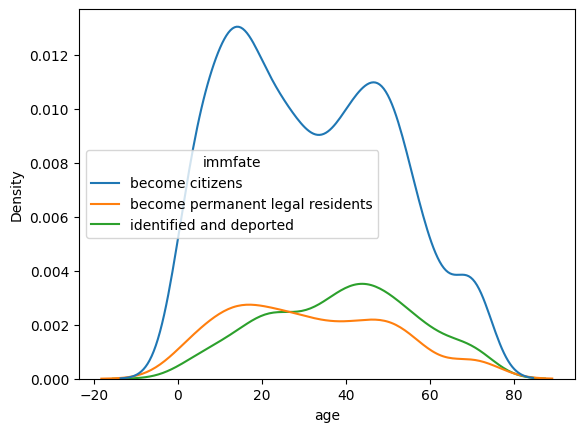

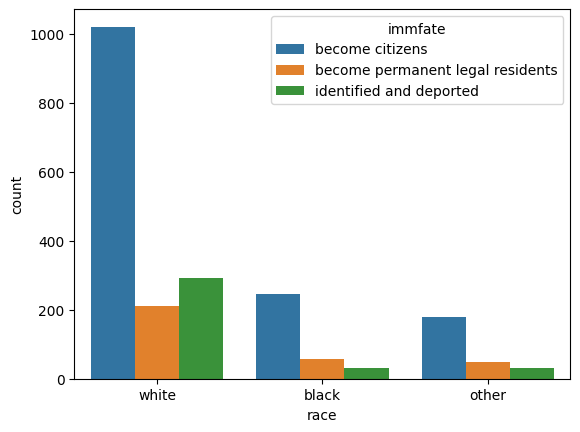

race                                 black     other     white
immfate                                                       
become citizens                   0.735736  0.695312  0.669731
become permanent legal residents  0.168168  0.187500  0.138542
identified and deported           0.096096  0.117188  0.191727 



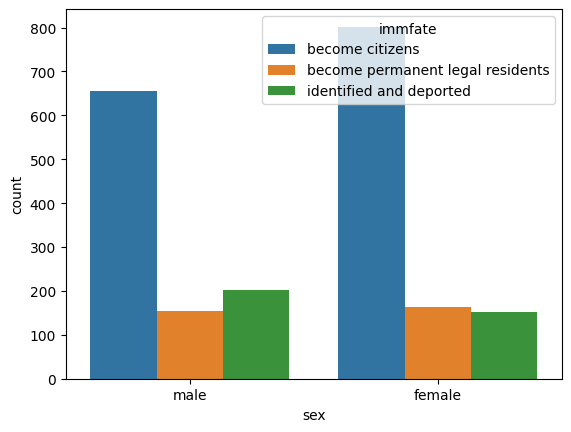

sex                                 female      male
immfate                                             
become citizens                   0.717995  0.647581
become permanent legal residents  0.145927  0.152024
identified and deported           0.136079  0.200395 



In [15]:
### immfate

# vars already cleaned
# immfate by age
sns.kdeplot(data=df, x='age', hue='immfate')
plt.show()

# immfate by race
sns.countplot(data=df, x='race', hue='immfate')
plt.show()
# output may be influenced by amount of each race in each sample
print(pd.crosstab(df['immfate'],df['race'],normalize = 'columns'),'\n')
## white
# 67.0% said become citizens
# 13.9% said become permanent legal residents
# 19.2% said identified and deported
## black
# 73.6% said become citizens
# 16.8% said become permanent legal residents
# 9.6% said identified and deported
## other
# 69.5% said become citizens
# 18.8% said become permanent legal residents
# 11.7% said identified and deported
## ^^ could maybe do a plot with this info

# immfate by sex
sns.countplot(data=df, x='sex', hue='immfate')
plt.show()
print(pd.crosstab(df['immfate'],df['sex'],normalize = 'columns'),'\n')
## male
# 64.8% said become citizens
# 15.2% said become permanent legal residents
# 20.0% said identified and deported
## female
# 71.8% said become citizens
# 14.6% said become permanent legal residents
# 13.6% said identified and deported
## ^^ could maybe do a plot with this info

      adoptus          immfate                   letin1a      letinhsp1  \
71012    both  become citizens          reduced a little      decreased   
71030    both  become citizens          reduced a little  left the same   
71028    both  become citizens          reduced a little  left the same   
71025    both  become citizens  remain the same as it is  left the same   
71022    both  become citizens        increased a little      increased   

           letinasn1  age     sex   race born  
71012  left the same   65    male  white  yes  
71030  left the same   15  female  white  yes  
71028  left the same   12    male  white  yes  
71025  left the same    2  female  white  yes  
71022      increased    3  female  white  yes  


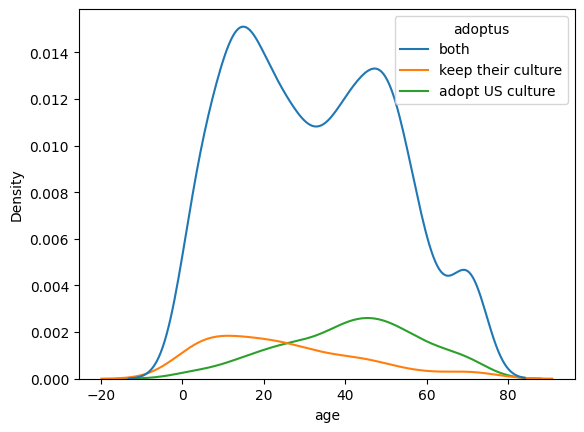

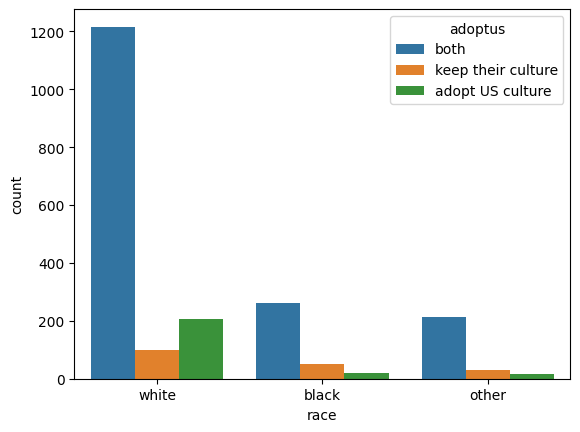

race                   black     other     white
adoptus                                         
adopt US culture    0.057057  0.058594  0.136573
both                0.789790  0.828125  0.798424
keep their culture  0.153153  0.113281  0.065003 



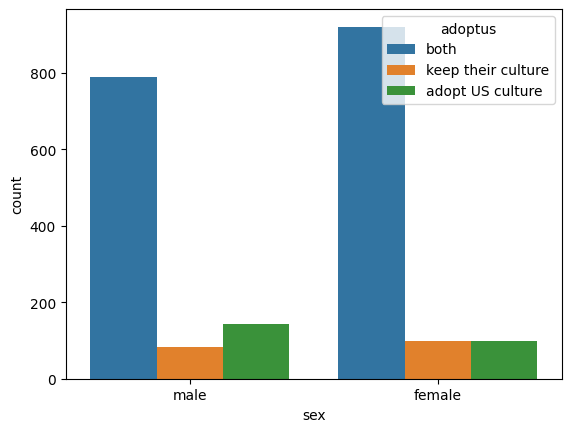

sex                   female      male
adoptus                               
adopt US culture    0.088630  0.141165
both                0.823635  0.777887
keep their culture  0.087735  0.080948 



In [14]:
### adoptus
# similar to immfate

# replacing varibales because the numeric version doesn't mean much and visually looks bad
df['adoptus'] = df['adoptus'].replace("1.0", "adopt US culture").replace("2.0", "keep their culture").replace("3.0", "both")
print(df.head())

sns.kdeplot(data=df, x='age', hue='adoptus')
plt.show()
# very very similar pattern to immfate

# by race
# replacing varibales
sns.countplot(data=df, x='race', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['race'],normalize = 'columns'),'\n')
## white
# 13.7% responded with adopt US culture
# 6.5% responded with keep their culture
# 79.8% responded with both
## black
# 5.7% responded with adopt US culture
# 15.3% responded with keep their culture
# 79.0% responded with both
## other
# 5.9% responded with adopt US culture
# 11.3% responded with keep their culture
# 82.8% responded with both
## ^^ could maybe do a plot with this info

# by sex
sns.countplot(data=df, x='sex', hue='adoptus')
plt.show()
# need proportions
print(pd.crosstab(df['adoptus'],df['sex'],normalize = 'columns'),'\n')
## male
# 14.1% responded with adopt US culture
# 8.1% responded with keep their culture
# 77.8% responded with both
## female
# 8.9% responded with adopt US culture
# 8.8% responded with keep their culture
# 82.4% responded with both
## ^^ could maybe do a plot with this info


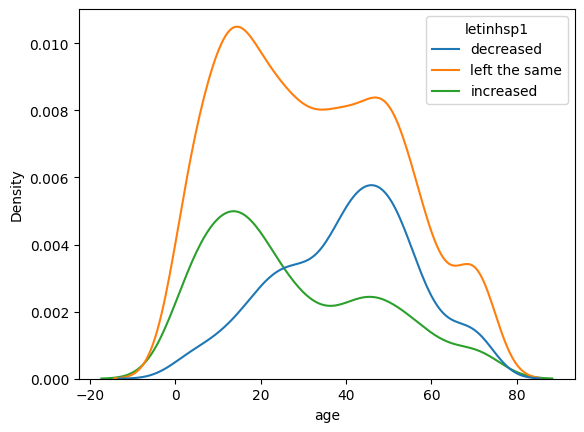

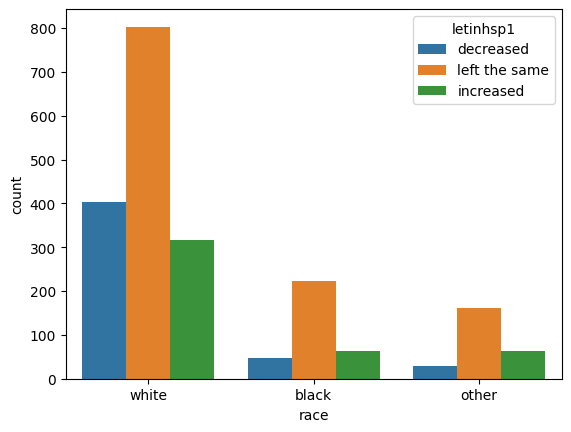

letinhsp1  decreased  increased  left the same
race                                          
black       0.144144   0.189189       0.666667
other       0.117188   0.250000       0.632812
white       0.264609   0.208142       0.527249 



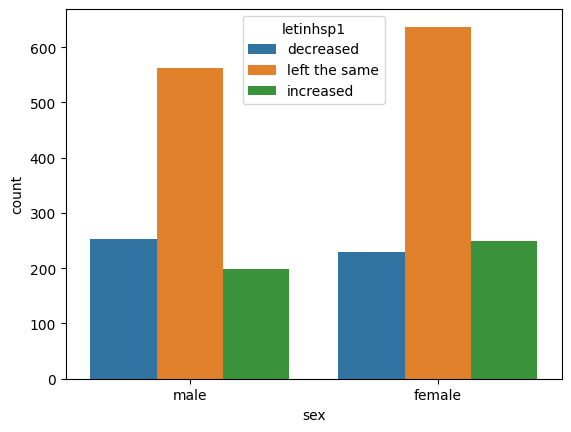

letinhsp1  decreased  increased  left the same
sex                                           
female      0.205909   0.223814       0.570278
male        0.249753   0.195459       0.554788 



In [11]:
#Let in hispanics data by age
sns.kdeplot(data=df, x='age', hue='letinhsp1')
plt.show()
#Let in hispanics data by race
sns.countplot(data=df, x='race', hue='letinhsp1',)
plt.show()
print(pd.crosstab(df['race'],df['letinhsp1'],normalize = 'index'),'\n')
#white
#decrease: 26.5%
#increase: 20.8%
#left same: 52.7%

#black:
#decrease: 14.4%
#increase: 18.9%
#left same: 66.7%
#other:
#decrease: 11.7%
#increase: 25.%
#left same: 63.3%

#Let in hispanics data by sex
sns.countplot(data=df, x='sex', hue='letinhsp1')
plt.show()
print(pd.crosstab(df['sex'],df['letinhsp1'],normalize = 'index'),'\n')

#female:
#decrease: 20.6%
#increase: 22.4%
#left same: 57%

#male
#decrease: 25%
#increase: 20%
#left same: 55.5%
